In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

## DATA LOAD

In [2]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
test_ids = test_df['Id']

## LOOKING DATA

In [3]:
print("Column names:\n", train_df.columns.values)
print("\nShape:", train_df.shape)
print("\nDuplicated data:", train_df.duplicated().sum())

Column names:
 ['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' '

<AxesSubplot:>

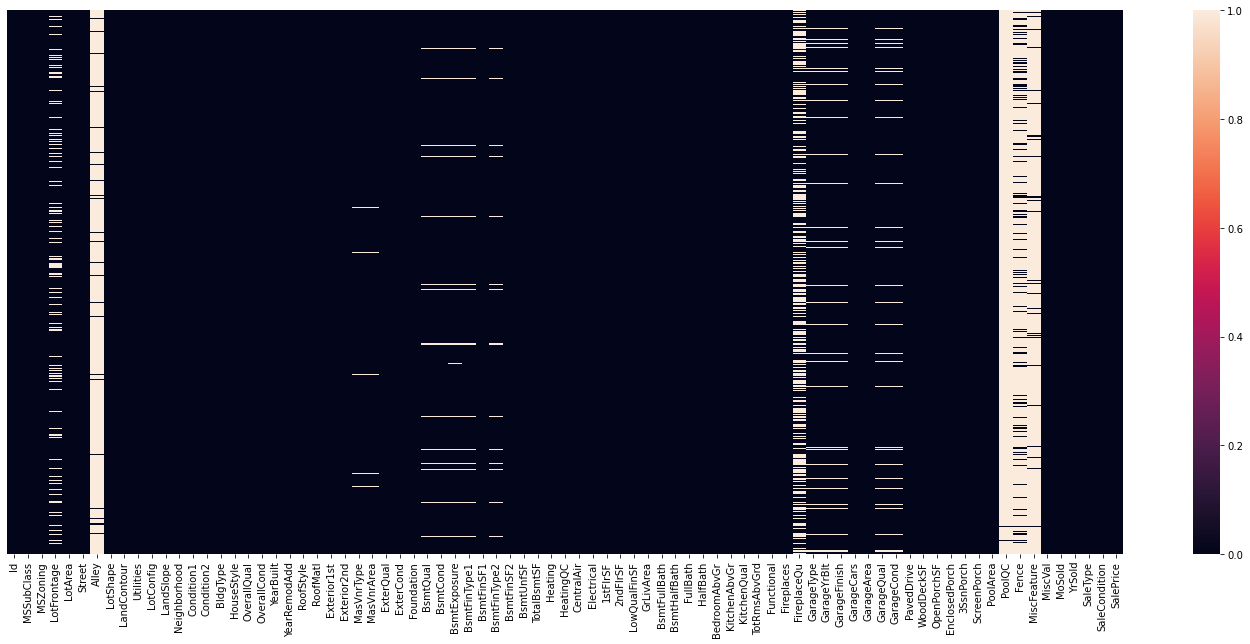

In [4]:
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(data=train_df.isnull(), yticklabels=False, ax=ax)

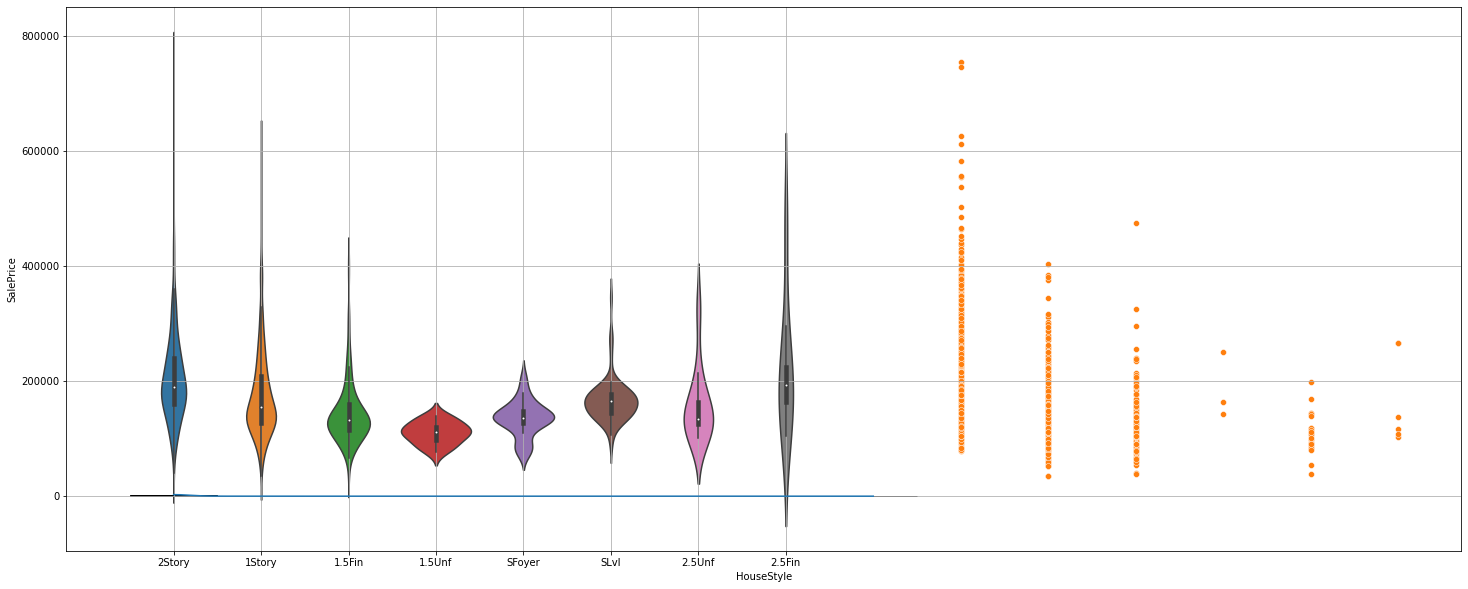

In [5]:
fig, ax = plt.subplots(figsize=(25,10))
sns.countplot(x=train_df['SaleCondition'])
sns.histplot(x=train_df['SaleType'], kde=True, ax=ax)
sns.violinplot(x=train_df['HouseStyle'], y=train_df['SalePrice'],ax=ax)
sns.scatterplot(x=train_df["Foundation"], y=train_df["SalePrice"], palette='deep', ax=ax)
plt.grid()

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

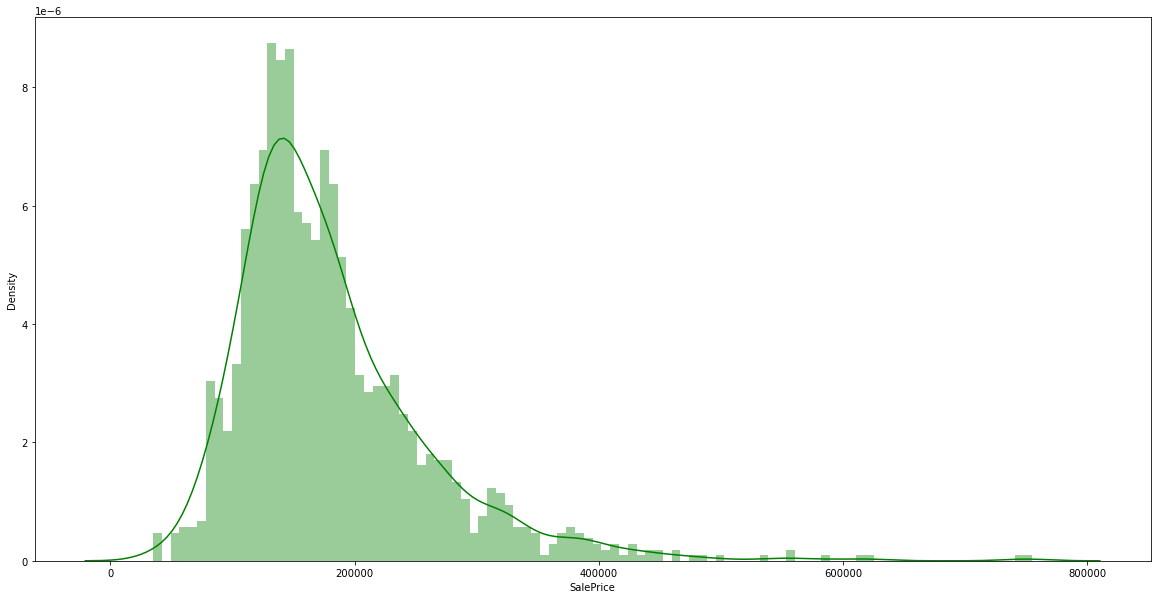

In [6]:
plt.figure(figsize=(20, 10))
sns.distplot(train_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})

## CLEANING DATA

In [7]:
train_df['FireplaceQu'].fillna("No", inplace=True)
train_df['BsmtQual'].fillna("No", inplace=True)
train_df['BsmtCond'].fillna("No", inplace=True)
train_df['BsmtFinType1'].fillna("No", inplace=True)
train_df['BsmtFinType2'].fillna("No", inplace=True)
train_df['BsmtFinType2'].fillna("None", inplace=True)

def fill_all_missing_values(data):
    for col in data.columns:
        if((data[col].dtype == 'float64') or (data[col].dtype == 'int64')):
            data[col].fillna(data[col].mean(), inplace=True)
        else:
             data[col].fillna(data[col].mode()[0], inplace=True)


fill_all_missing_values(train_df)
fill_all_missing_values(test_df)

In [8]:
drop_col = ['Id', 'Alley', 'PoolQC', 'MiscFeature', 'Fence', 'MoSold', 'YrSold', 'MSSubClass',
            'GarageType', 'GarageArea', 'GarageYrBlt', 'GarageFinish', 'YearRemodAdd', 'LandSlope',
            'BsmtUnfSF', 'BsmtExposure', '2ndFlrSF', 'LowQualFinSF', 'Condition1', 'Condition2', 'Heating',
             'Exterior1st', 'Exterior2nd', 'HouseStyle', 'LotShape', 'LandContour', 'LotConfig', 'Functional',
             'BsmtFinSF1', 'BsmtFinSF2', 'FireplaceQu', 'WoodDeckSF', 'GarageQual', 'GarageCond', 'OverallCond'
           ]

train_df.drop(drop_col, axis=1, inplace=True)
test_df.drop(drop_col, axis=1, inplace=True)

### ENCODING

In [9]:
encoder_col = ['BsmtQual', 'BsmtCond', 'ExterQual', 'ExterCond', 'KitchenQual', 'PavedDrive', 'MSZoning', 'Neighborhood',
               'Electrical', 'BsmtFinType1', 'BsmtFinType2', 'Utilities', 'Foundation', 'MasVnrType', 'SaleCondition',
               'RoofStyle', 'RoofMatl', 'Street' ,'BldgType', 'SaleType', 'CentralAir']

In [10]:
train_df['BsmtQual'].head()

0    Gd
1    Gd
2    Gd
3    TA
4    Gd
Name: BsmtQual, dtype: object

In [11]:
encoder = LabelEncoder()
def encode_columns(train, test):
    for col in encoder_col:
        train[col] = encoder.fit_transform(train[col])
        test[col]  = encoder.transform(test[col])
encode_columns(train_df, test_df)

In [12]:
train_df['BsmtQual'].head()

0    2
1    2
2    2
3    4
4    2
Name: BsmtQual, dtype: int32

### JOIN  AND DROP COLUMNS

In [13]:
train_df['BsmtRating'] = train_df['BsmtCond'] * train_df['BsmtQual']
train_df['ExterRating'] = train_df['ExterCond'] * train_df['ExterQual']
train_df['BsmtFinTypeRating'] = train_df['BsmtFinType1'] * train_df['BsmtFinType2']

train_df['BsmtBath'] = train_df['BsmtFullBath'] + train_df['BsmtHalfBath']
train_df['Bath'] = train_df['FullBath'] + train_df['HalfBath']
train_df['PorchArea'] = train_df['OpenPorchSF'] + train_df['EnclosedPorch'] + train_df['3SsnPorch'] + train_df['ScreenPorch']

test_df['BsmtRating'] = test_df['BsmtCond'] * test_df['BsmtQual']
test_df['ExterRating'] = test_df['ExterCond'] * test_df['ExterQual']
test_df['BsmtFinTypeRating'] = test_df['BsmtFinType1'] * test_df['BsmtFinType2']

test_df['BsmtBath'] = test_df['BsmtFullBath'] + test_df['BsmtHalfBath']
test_df['Bath'] = test_df['FullBath'] + test_df['HalfBath']
test_df['PorchArea'] = test_df['OpenPorchSF'] + test_df['EnclosedPorch'] + test_df['3SsnPorch'] + test_df['ScreenPorch']

In [14]:
drop_col = ['OverallQual', 'ExterCond', 'ExterQual', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2',
            'HeatingQC', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'BsmtFullBath', 'BsmtHalfBath',
            'FullBath', 'HalfBath']

train_df.drop(drop_col, axis=1, inplace=True)
test_df.drop(drop_col, axis=1, inplace=True)

print(train_df.shape)

(1460, 36)


In [15]:
train_df['LotArea'].head()

0     8450
1     9600
2    11250
3     9550
4    14260
Name: LotArea, dtype: int64

In [16]:
ft = FunctionTransformer(func=np.log1p)
train_df['LotArea'] = ft.fit_transform(train_df['LotArea'])
test_df['LotArea'] = ft.transform(test_df['LotArea'])

In [17]:
train_df['LotArea'].head()

0    9.042040
1    9.169623
2    9.328212
3    9.164401
4    9.565284
Name: LotArea, dtype: float64

## CHECKING CHANGES

In [18]:
df_num = train_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,LotFrontage,LotArea,YearBuilt,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MiscVal,SalePrice,BsmtBath,Bath,PorchArea
0,65.0,9.042040,2003,196.0,856,856,1710,3,1,8,0,2,0,0,208500,1,3,61
1,80.0,9.169623,1976,0.0,1262,1262,1262,3,1,6,1,2,0,0,181500,1,2,0
2,68.0,9.328212,2001,162.0,920,920,1786,3,1,6,1,2,0,0,223500,1,3,42
3,60.0,9.164401,1915,0.0,756,961,1717,3,1,7,1,3,0,0,140000,1,1,307
4,84.0,9.565284,2000,350.0,1145,1145,2198,4,1,9,1,3,0,0,250000,1,3,84


array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>],
       [<AxesSubplot:title={'center':'KitchenAbvGr'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGrd'}>,
        <AxesSubplot:title={'center':'Fireplaces'}>,
        <AxesSubplot:title={'center':'GarageCars'}>],
       [<AxesSubplot:title={'center':'PoolArea'}>,
        <AxesSubplot:title={'center':'MiscVal'}>,
        <AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'BsmtBath'}>],
       [<AxesSubplot:title={'center':'Bath'}>,
        <AxesSubplot:title={'center':'PorchArea'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

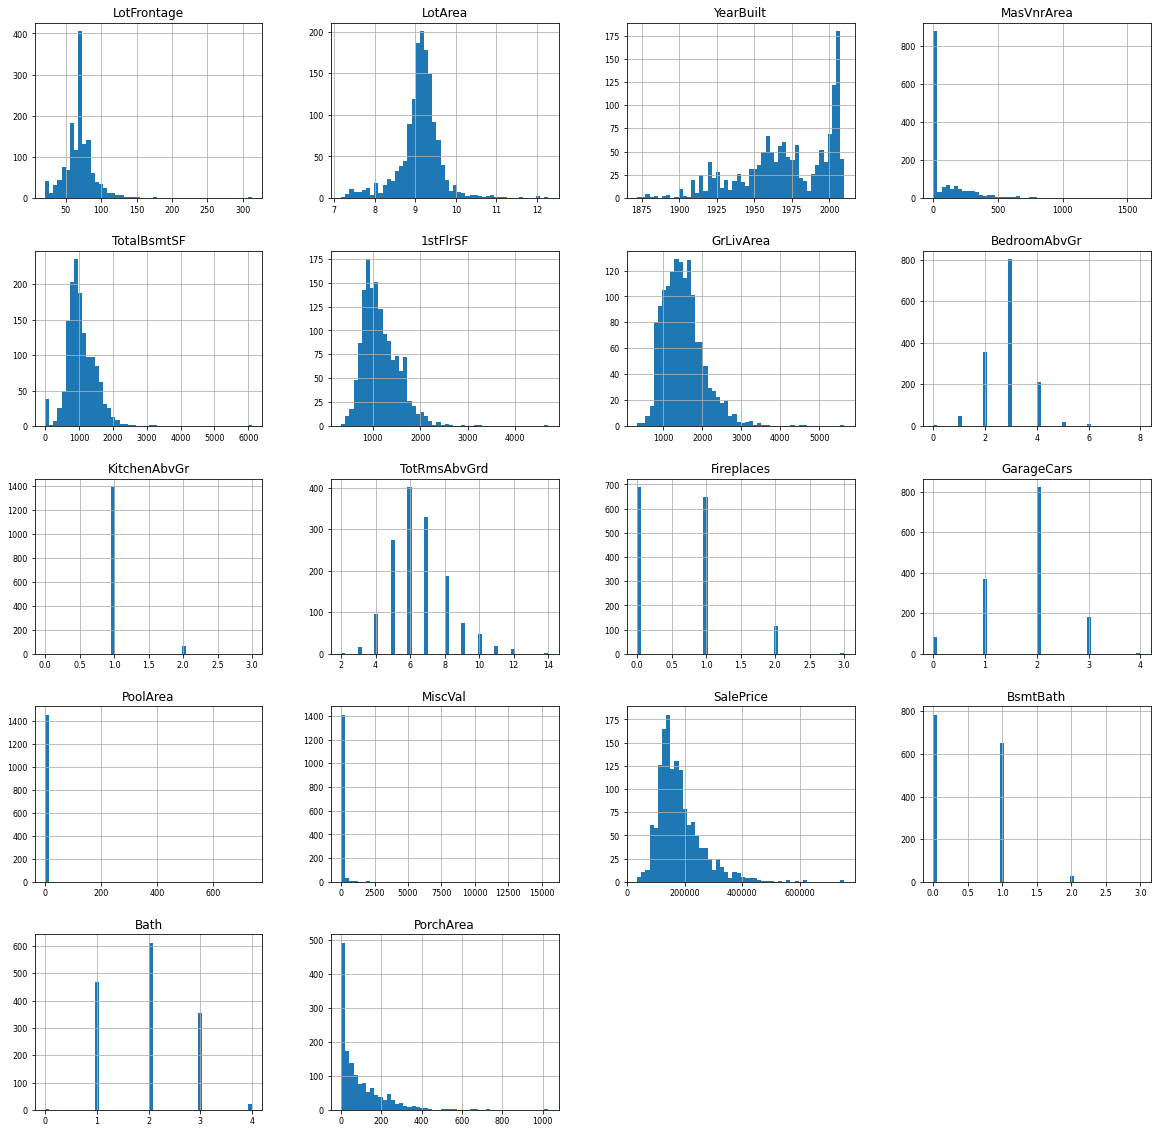

In [19]:
df_num.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)

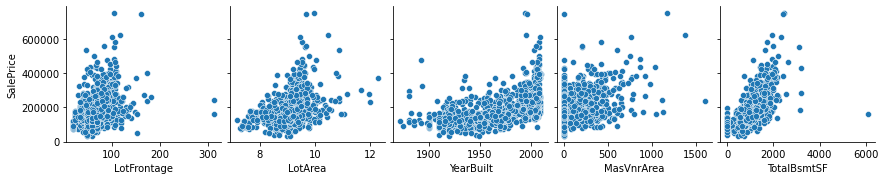

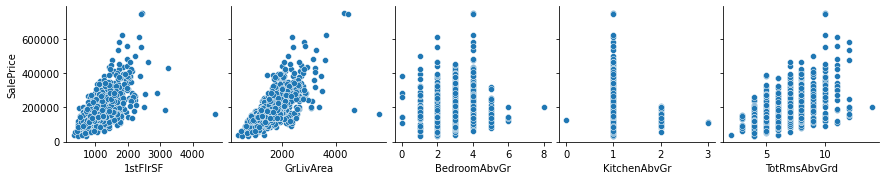

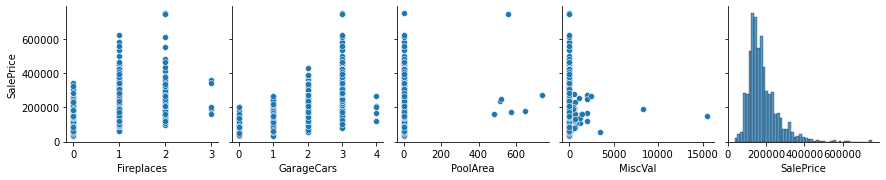

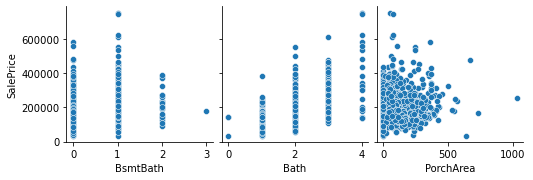

In [20]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

In [21]:
y = train_df['SalePrice']
X = train_df.drop(['SalePrice'], axis=1)

candidate_max_leaf_nodes = [250]

for node in candidate_max_leaf_nodes:
    model = RandomForestRegressor(max_leaf_nodes=node,)
    model.fit(X, y)
    score = cross_val_score(model, X, y, cv=10)
    acc_rfr = round(score.mean() * 100, 2)
    print(acc_rfr)

83.77


In [22]:
svc = SVC()
svc.fit(X,y)
X_test = test_df
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X,y) * 100, 2)
acc_svc

1.99

In [23]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X, y)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X,y) * 100, 2)
acc_knn

99.73

In [24]:
gaussian = GaussianNB()
gaussian.fit(X, y)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X, y) * 100, 2)
acc_gaussian

58.36

In [25]:
perceptron = Perceptron()
perceptron.fit(X, y)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X, y) * 100, 2)
acc_perceptron

0.82

In [26]:
sgd = SGDClassifier()
sgd.fit(X, y)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X, y) * 100, 2)
acc_sgd

0.96

In [27]:
random_forest = RandomForestClassifier(n_estimators=250)
random_forest.fit(X, y)
Y_pred = random_forest.predict(X_test)
random_forest.score(X, y)
acc_rfc = round(random_forest.score(X, y) * 100, 2)
acc_rfc

99.73

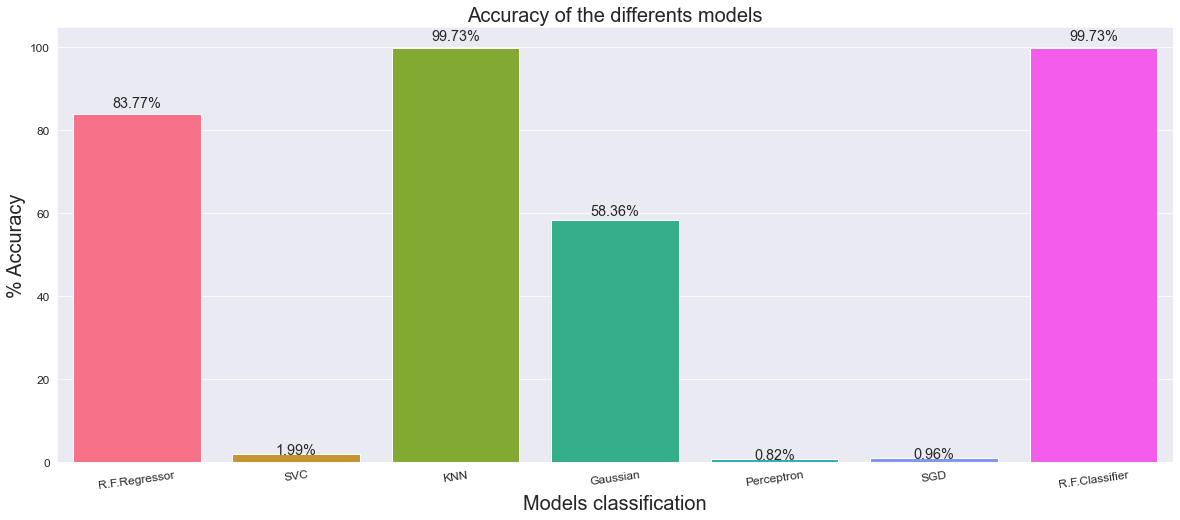

In [28]:
models_name_list = ['R.F.Regressor', 'SVC', 'KNN', 'Gaussian', 'Perceptron', 'SGD', 'R.F.Classifier']
price_precision_list = [acc_rfr, acc_svc, acc_knn, acc_gaussian, acc_perceptron, acc_sgd, acc_rfc]
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=models_name_list, y=price_precision_list, palette = "husl", saturation =2.0)
plt.xlabel('Models classification', fontsize = 20 )
plt.ylabel('% Accuracy', fontsize = 20)
plt.title('Accuracy of the differents models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [29]:
price = random_forest.predict(test_df)
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": price
})
submission.to_csv("submission.csv", index=False)
submission

,Id,SalePrice
0,1461,137000
1,1462,158000
2,1463,181000
3,1464,181000
4,1465,196000
...,...,...
1454,2915,75000
1455,2916,88000
1456,2917,141000
1457,2918,123600


In [30]:
price = model.predict(test_df)
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": price
})

submission.to_csv("submission2.csv", index=False)
submission

,Id,SalePrice
0,1461,120102.911522
1,1462,150937.426996
2,1463,179853.694247
3,1464,180773.598509
4,1465,183543.029875
...,...,...
1454,2915,87397.699276
1455,2916,88038.556420
1456,2917,151728.916978
1457,2918,120444.164318
